# 요인 수준이 2개 이상인 경우

- t-test의 직접적인 적용이 어렵다.
- 관심있는 요인의 수준이 두 개 이상이거나, 동시에 여러 요인이 관심의 대상이 되는 상황들이 다수 존재
- 분산분석은 위와 같은 실험을 할 때 유용
- 1920년대 초 Fisher에 의해 발전
- 산업계의 다양한 실험에 광범위하게 활용 중

## 예시

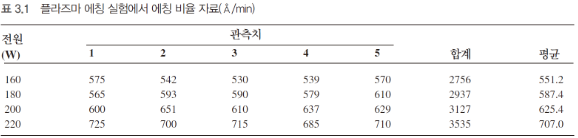

In [65]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [66]:
df = pd.DataFrame({
    '160W': [575, 542, 530, 539, 570],
    '180W': [565, 593, 590, 579, 610],
    '200W': [600, 651, 610, 637, 629],
    '220W': [725, 700, 715, 685, 710],
})

df.describe()

,160W,180W,200W,220W
count,5.000000,5.000000,5.000000,5.000000
mean,551.200000,587.400000,625.400000,707.000000
std,20.017492,16.742162,20.525594,15.247951
min,530.000000,565.000000,600.000000,685.000000
25%,539.000000,579.000000,610.000000,700.000000
50%,542.000000,590.000000,629.000000,710.000000
75%,570.000000,593.000000,637.000000,715.000000
max,575.000000,610.000000,651.000000,725.000000


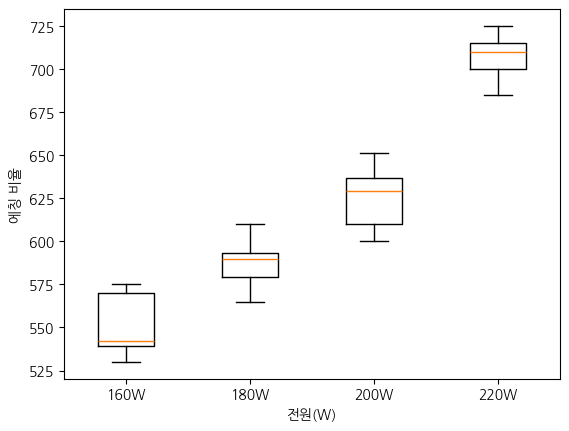

In [67]:
plt.boxplot(df)
plt.xticks([1, 2, 3, 4], df.columns.tolist())
plt.xlabel('전원(W)')
plt.ylabel('에칭 비율')
plt.show()

전원을 변환시키면 평균 에칭 비율이 변하는가? 최적 전원 수준이 존재하는가?
- t-test는 이런 문제에 부적합. 2개 이상의 요인 수준이 존재하기 때문

# 분산분석(Analysis of Variance, ANOVA)

In [94]:
import statsmodels.api as sm

levels = df.columns.tolist() * 5

anova_df = pd.DataFrame({'관측치': df.values.reshape(1, -1).tolist()[0], 
                      '처리수준': levels})

print(sm.stats.anova_oneway(data=anova_df['관측치'], groups=anova_df['처리수준'],
                            use_var='equal'))

statistic = 66.79707321945857
pvalue = 2.882865908493295e-09
df = (3.0, 16.0)
df_num = 3.0
df_denom = 16.0
nobs_t = 20.0
n_groups = 4
means = [551.2 587.4 625.4 707. ]
nobs = [5. 5. 5. 5.]
vars_ = [400.7 280.3 421.3 232.5]
use_var = equal
welch_correction = True
tuple = (66.79707321945857, 2.882865908493295e-09)


__Effect model(효과모형)__
$$
y_{ij} = \mu + \tau_i + \epsilon_{ij} \begin{cases}
i= 1,2,...a \\
j= 1, 2,...,n
\end{cases}
$$

__Means model(평균모형)__
$$
y_{ij} = \mu_i + \epsilon_{ij} \begin{cases}
i= 1,2,...a \\
j= 1, 2,...,n
\end{cases}
$$

전체 변동성은 총제곱합으로 계산된다.  
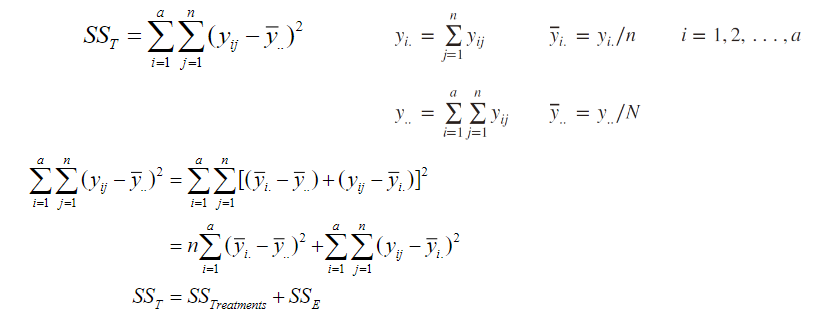

$$
SS_T = SS_{Treatments} + SS_E
$$

$SS_{Treatments}$ 값이 클수록, 처리 평균의 차이가 크다는 의미  
$SS_{Treatments}$ 값이 작을수록, 처리 평균의 차이가 작다는 의미

__통계적 가설__

$$
H_0: \mu_1 = \mu_2 \cdots =\mu_a \\
H_1: \mu_i \neq \mu_j \quad \text{최소한 한 쌍 }i,j\text{에 대해}
$$

제곱합을 평균의 동일성에 대한 가설을 검정하기 위해 직접 비교할 수는 없지만, 평균제곱은 비교할 수 있다. __평균제곱(Mean squares)__ 은 제곱합을 자유도로 나눈 것이다.

$$
df_{Total} = df_{Treatments} + df_{Error} \\
an -1 = a-1 + a(n-1) \\
MS_{Treatments} = \frac{SS_{Treatments}}{a-1},\ MS_E = \frac{SS_E}{a(n-1)}
$$

제곱합을 자유도로 나누지 않으면 표본크기에 따라 무한정 커져 정확한 검정을 할 수 없게 된다.

- 만약 처리평균이 동일하다면, 처리평균제곱과 오차평균제곱은 이론적으로 동일하다.
- 만약 처리평균이 다르다면, 처리평균제곱은 오차평균제곱보다 크다.

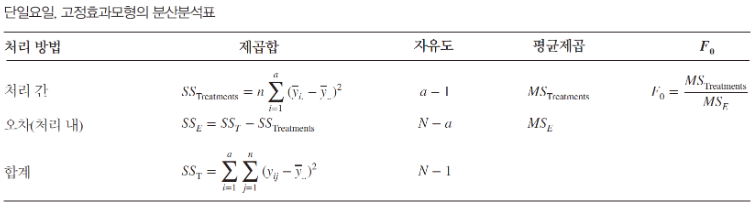

$F_0$에서 기준으로 삼는 분포는 $F_{a-1, a(n-1)}$ 분포이다. 아래와 같은 상황에서 귀무가설을 기각한다.

$$
F_0 > F_{\alpha; a-1,a(n-1)}
$$

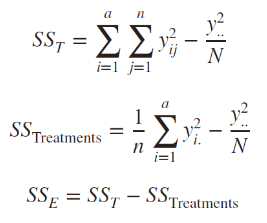

In [69]:
pd.DataFrame(pd.concat([df.T, df.sum(), df.mean()], axis=1).values, 
             columns=['관측치1', '관측치2', '관측치3', '관측치4', '관측치5', '합계', '평균'],
             index=['160W', '180W', '200W', '220W'])

,관측치1,관측치2,관측치3,관측치4,관측치5,합계,평균
160W,575.0,542.0,530.0,539.0,570.0,2756.0,551.2
180W,565.0,593.0,590.0,579.0,610.0,2937.0,587.4
200W,600.0,651.0,610.0,637.0,629.0,3127.0,625.4
220W,725.0,700.0,715.0,685.0,710.0,3535.0,707.0


## ANOVA 모형 적합성

- 가정을 확인하는 것이 매우 중요하다.
- 정규성
- 등분산성
- 독립성

__잔차 검정__
$$
e_{ij} = y_{ij} - \hat{y}_{ij} \\
= y_{ij} - \bar{y}_{i.}
$$

정규성 가정은 __잔차 정규확률그림(Normal probability plot of residuals)__ 을 그려본다.

다른 유형의 잔차 그림도 있다. 잔차 대 수행 순서 산점도, 잔차 대 적합값 산점도 등

## Post-ANOVA 평균 비교

분산분석은 처리 평균이 동일하다는 가설을 검정한다. 귀무가설이 기각되면, 어떤 특정 평균이 다른지 알 수 없다. 따라서 이후에 어떤 특정 평균이 다른지 결정하는 것을 다중비교 문제라고 한다. 이를 위해 평균에 대한 pairwise t-검정을 사용한다. (Fisher's Least Signinficant Difference 방법)

## 표본 크기의 결정

Sensitivity: 실험자가 감지하고자 하는 평균의 차이의 정도.  
일반적으로, 실험의 반복 횟수가 늘어나면 Sensitivity가 증가하거나, 평균의 작은 차이를 감지하기 쉬워진다.

고정효과모형의 경우 검정력($1-\beta$)을 계산하여 결정한다.

# 분산분석 II

### 김종찬 박사
연세대학교 미래캠퍼스 소프트웨어 디지털 헬스케어 융합학부

---

## 1. 랜덤효과모형 (Random Effects Model)

- 요인에는 다양한 많은 수준들이 존재할 수 있습니다.
- 실험자는 이러한 수준들 중 **a개의 수준을 무작위로 선택**합니다.
- **수준의 전체 모집단에 대한 추론**이 이루어집니다.

### 고정효과모형과의 차이
- **고정효과모형**: 특정 수준에 대한 효과를 추정하며, 관심 있는 모든 수준이 연구에 포함됩니다.
    - 예: A, B, C 프로그램에 참여한 학생들의 성적 차이를 분석할 때, 요인은 프로그램이고 수준은 A, B, C 각 프로그램입니다.
- **랜덤효과모형**: 수준을 무작위로 선택하여 모집단의 일반적인 효과를 추정합니다.
    - 예: 여러 학교 중 무작위로 선택된 학교의 무작위로 선택된 학생들의 성적 차이를 분석할 때, 요인은 학교이고 수준은 학교1, 학교2, 학교3 등입니다.

---

## 2. 고정효과모형과 랜덤효과모형의 비교

### 고정효과모형 (Fixed Effects Model)
- 요인의 수준이 고정되며, 고정된 수준에만 적용 가능한 모형입니다.
    - 예: 특정 학교 간 성적을 비교할 때, 비교하고자 하는 학교가 고정되어 있는 경우 (학교A, 학교B, 학교C).

수식은 다음과 같이 표현됩니다:

$$
Y_{ij} = \mu + \beta_i + \epsilon_{ij}
$$

- $Y_{ij}$: 학교 $i$에 속한 학생 $j$의 성적
- $\mu$: 전체 평균 성적
- $\beta_i$: 학교 $i$의 고정된 효과
- $\epsilon_{ij}$: 학생 $j$의 개별 오차

### 랜덤효과모형 (Random Effects Model)
- 요인의 수준이 랜덤이며, 요인의 모든 수준에 적용 가능한 모형입니다.
    - 예: 무작위로 선택된 여러 학교 간 성적을 비교하는 경우.

수식은 다음과 같습니다:

$$
Y_{ij} = \mu + \tau_i + \epsilon_{ij}
$$

- $Y_{ij}$: 학교 $i$에 속한 학생 $j$의 성적
- $\mu$: 전체 평균 성적
- $\tau_i$: 학교 $i$의 랜덤 효과 (정규분포 $N(0, \sigma_\tau^2)$에서 발생)
- $\epsilon_{ij}$: 학생 $j$의 개별 오차

---

## 3. 랜덤효과모형의 분산분석 (ANOVA for Random Effects Model)

랜덤효과모형에서는 분산분석을 통해 집단 간의 변동성이 유의미한지 검정합니다.

$$
y_{ij} = \mu + \tau_i + \epsilon_{ij} \quad \text{where} \quad i = 1,2, \dots, a \quad \text{and} \quad j = 1,2, \dots, n
$$

분산의 표현은 다음과 같습니다:

$$
V(y_{ij}) = \sigma_\tau^2 + \sigma^2
$$

- $\sigma_\tau^2$: 집단 간 차이에 의한 변동성 (랜덤효과로 발생) → 클수록 집단 간 차이가 큼
- $\sigma_\epsilon^2$: 집단 내 차이에 의한 변동성 (오차항으로 발생) → 클수록 집단 내 차이가 큼

랜덤효과와 오차항은 서로 독립적입니다.

---

## 4. Tukey의 검정 (Tukey's Test)

Tukey(1953)는 **모든 평균 비교의 쌍**에 대해 가설 검정 절차를 제안했습니다. 특히 표본 크기가 같고 유의수준이 $\alpha$일 때 신뢰구간을 만들어 두 평균의 유의미한 차이를 판단합니다.

### 스튜던트화 범위 통계량 (Studentized Range Statistic)
두 평균이 유의미하게 다른지 판단하는 기준:

$$
q = \frac{\bar{y}_{\text{max}} - \bar{y}_{\text{min}}}{\sqrt{MSE / n}}
$$

- $\bar{y}_{\text{max}}$: 가장 큰 평균
- $\bar{y}_{\text{min}}$: 가장 작은 평균
- $MSE$: Mean Squared Error (평균 제곱 오차)
- $n$: 각 그룹의 표본 크기

---

## 5. Tukey 검정 예제

플라즈마 에칭 실험에서의 예를 통해 Tukey 검정의 사용을 확인할 수 있습니다. 유의수준 $\alpha = 0.05$, 오차의 자유도 $f = 16$일 때의 결과는 다음과 같습니다.

Tukey 검정에서 임계값 $T_{0.05}$는:

$$
T_{0.05} = q_{0.05} \cdot \frac{MSE}{n}
$$

결과:

$$
T_{0.05} = 4.05 \quad \text{and} \quad \frac{333.70}{5} = 33.09
$$

평균 차이는 다음과 같이 계산됩니다:

- $\bar{y}_1 - \bar{y}_2 = 551.2 - 587.4 = -36.2^*$
- $\bar{y}_1 - \bar{y}_3 = 551.2 - 625.4 = -74.2^*$
- $\bar{y}_1 - \bar{y}_4 = 551.2 - 707.0 = -155.8^*$
- $\bar{y}_2 - \bar{y}_3 = 587.4 - 625.4 = -38.0^*$
- $\bar{y}_2 - \bar{y}_4 = 587.4 - 707.0 = -119.6^*$
- $\bar{y}_3 - \bar{y}_4 = 625.4 - 707.0 = -81.6^*$

---

이와 같이 랜덤효과모형 및 Tukey 검정을 통한 분석이 어떻게 진행되는지를 구체적으로 설명할 수 있습니다.
